In [25]:
# import Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [26]:
# read data
df = pd.read_csv('CKD.csv')


In [27]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,2.0,76.459948,c,3.0,0.0,normal,abnormal,notpresent,notpresent,148.112676,...,38.868902,8408.191126,4.705597,no,no,no,yes,yes,no,yes
1,3.0,76.459948,c,2.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,34.000000,12300.000000,4.705597,no,no,no,yes,poor,no,yes
2,4.0,76.459948,a,1.0,0.0,normal,normal,notpresent,notpresent,99.000000,...,34.000000,8408.191126,4.705597,no,no,no,yes,poor,no,yes
3,5.0,76.459948,d,1.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,38.868902,8408.191126,4.705597,no,no,no,yes,poor,yes,yes
4,5.0,50.000000,c,0.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,36.000000,12400.000000,4.705597,no,no,no,yes,poor,no,yes


In [28]:
df.describe()

,age,bp,al,su,bgr,bu,sc,sod,pot,hrmo,pcv,wc,rc
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,51.492308,76.459948,0.899749,0.395990,148.112676,57.482105,3.077356,137.528754,4.627244,12.518156,38.868902,8408.191126,4.705597
std,16.995379,13.492053,1.314769,1.041155,74.864224,49.336046,5.623758,9.215829,2.823323,2.715753,8.157274,2526.204544,0.841006
min,2.000000,50.000000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.850000,34.000000,6950.000000,4.500000
50%,54.000000,76.459948,0.000000,0.000000,127.000000,44.000000,1.400000,137.528754,4.627244,12.518156,38.868902,8408.191126,4.705597
75%,64.000000,80.000000,2.000000,0.000000,150.000000,62.500000,3.077356,141.000000,4.800000,14.600000,44.000000,9400.000000,5.100000
max,90.000000,180.000000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [29]:
# Find any missing data 
df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hrmo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [30]:
# numerical and categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.to_list()
numerical_columns = [ col for col in df.columns.to_list() if col not in categorical_columns]
categorical_columns

['sg',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [31]:
numerical_columns

['age',
 'bp',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hrmo',
 'pcv',
 'wc',
 'rc']

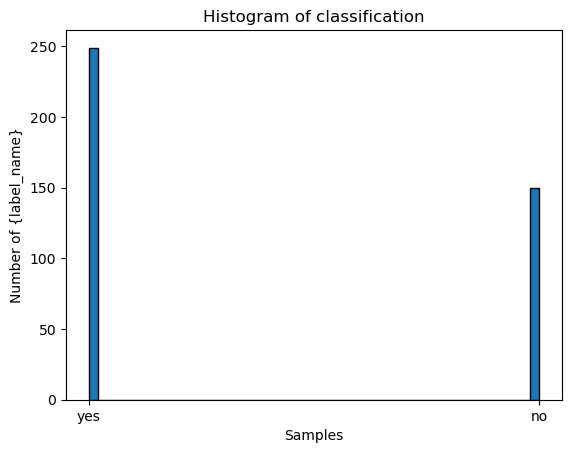

In [32]:
# histogram plot of Target column classification
def histogram_plot(label_name = 'category'):
    num_buckets = 50
    plt.hist(df[label_name], bins=num_buckets, edgecolor='black')
    plt.xlabel(f'Samples')
    plt.ylabel('Number of {label_name}')
    plt.title(f'Histogram of {label_name}')
    plt.show()
histogram_plot('classification')

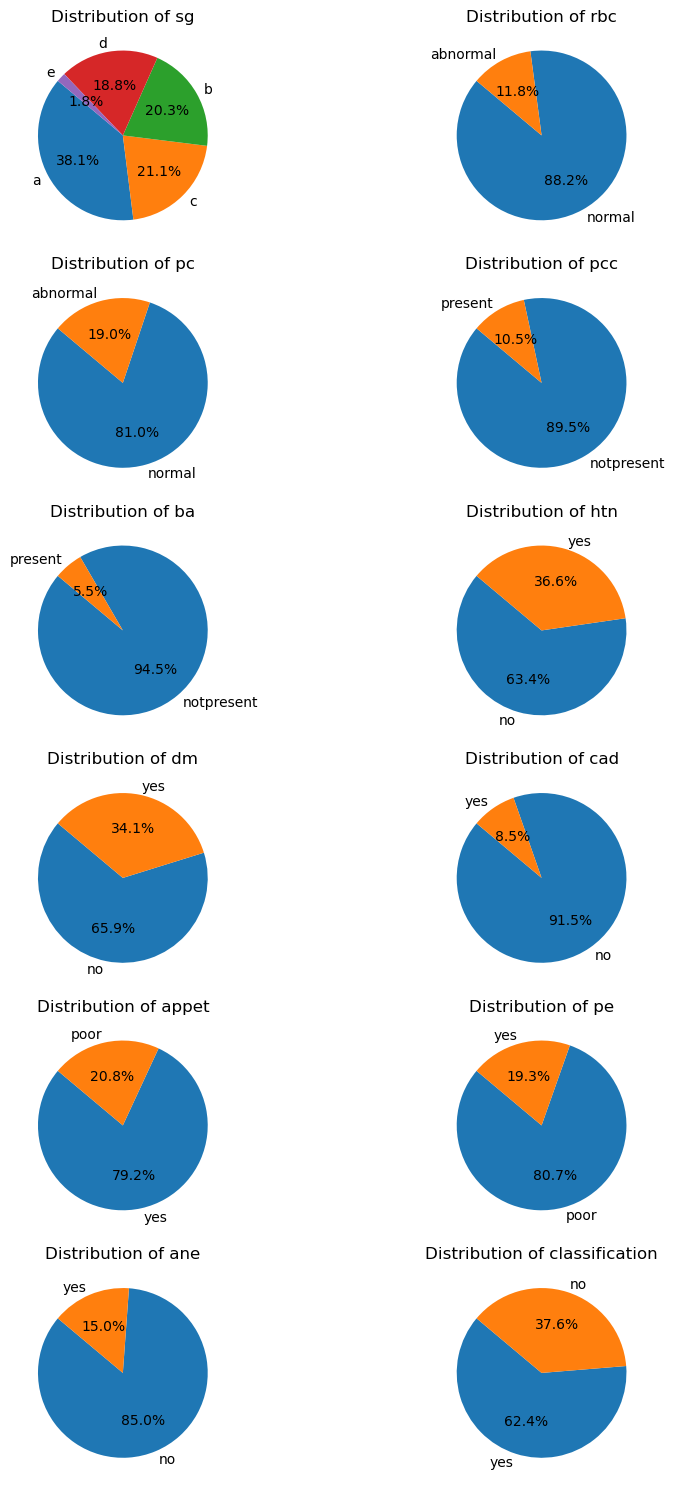

In [33]:
# the categorical columns pie chart plot:

cat_cols = categorical_columns
plot_cats = []
for i in cat_cols:
    if len(np.unique(df[i])) < 50:
        plot_cats.append(i)

cat_cols = plot_cats
fig, axes = plt.subplots(int(len(cat_cols)/2), 2, figsize=(10, 15))

for i, col in enumerate(cat_cols):
    row = i // 2
    col_idx = i % 2

    counts = df[col].value_counts()

    axes[row, col_idx].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    axes[row, col_idx].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

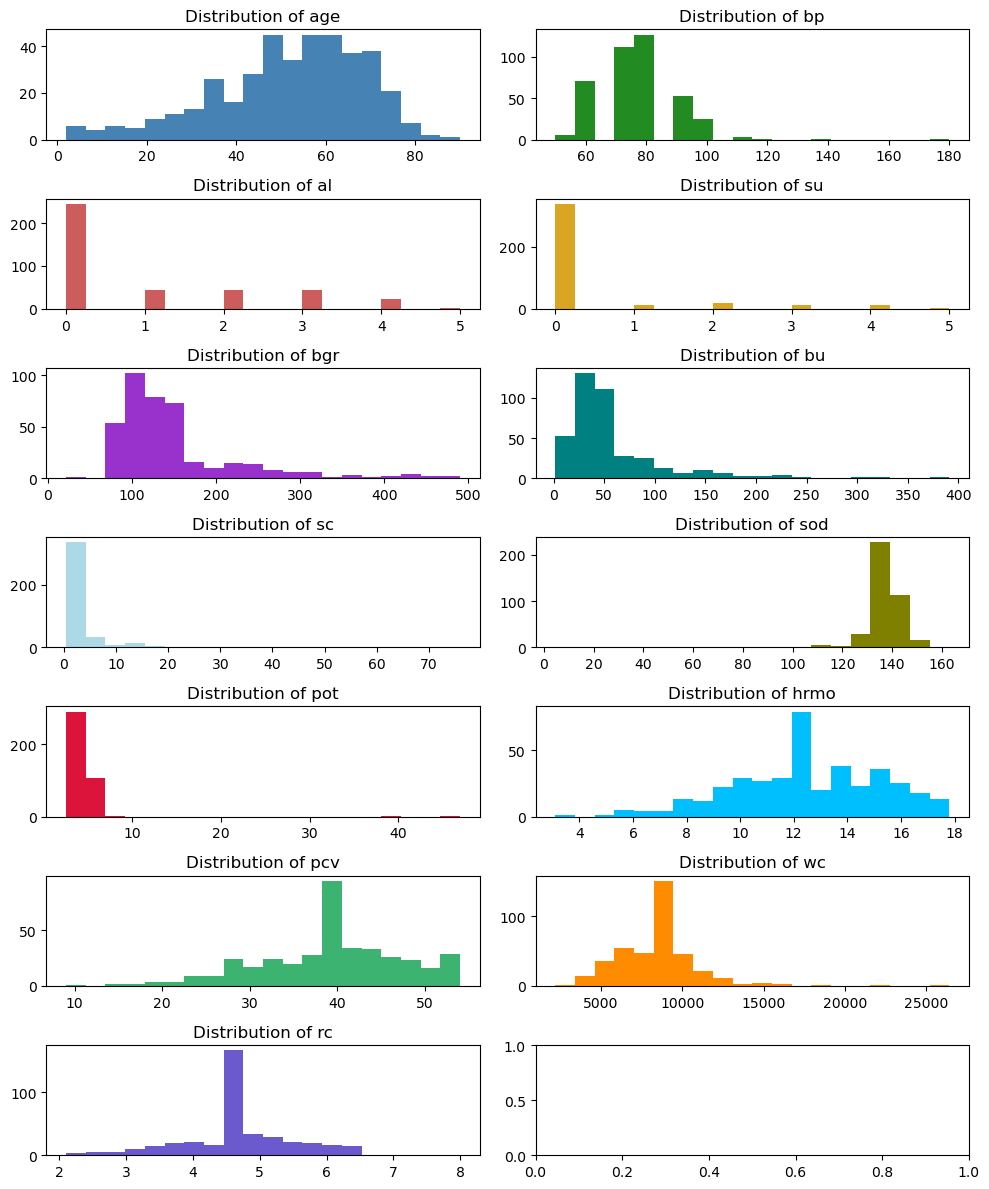

In [34]:
#Now let's understand the numerical columns :

num_cols = numerical_columns
fig, axes = plt.subplots(int(len(num_cols)/2)+1, 2, figsize=(10, 12))

colors = ['steelblue', 'forestgreen', 'indianred', 'goldenrod', 'darkorchid', 'teal', 'lightblue', 'olive','crimson', 'deepskyblue', 'mediumseagreen', 'darkorange', 'slateblue',
    'darkmagenta', 'lightcoral', 'dodgerblue', 'limegreen', 'orangered',
    'plum', 'mediumpurple', 'khaki', 'cornflowerblue', 'sienna',
    'chocolate', 'turquoise', 'orchid', 'peru', 'mediumvioletred',
    'tomato', 'seagreen', 'palevioletred', 'cadetblue', 'mediumorchid',
    'darkgoldenrod', 'firebrick', 'peachpuff', 'lightseagreen', 'tan',
    'slategrey', 'lavender', 'powderblue', 'mediumturquoise', 'salmon',
    'darkslateblue', 'coral', 'darkolivegreen', 'lightpink', 'royalblue',
    'darkcyan', 'palegreen', 'lightsteelblue', 'mediumspringgreen', 'bisque',
    'rosybrown', 'navajowhite', 'aquamarine', 'violet', 'gold']

for i, col in enumerate(num_cols):
    row = i // 2
    col_idx = i % 2
    axes[row, col_idx].hist(df[col], bins=20, color=colors[i])
    axes[row, col_idx].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

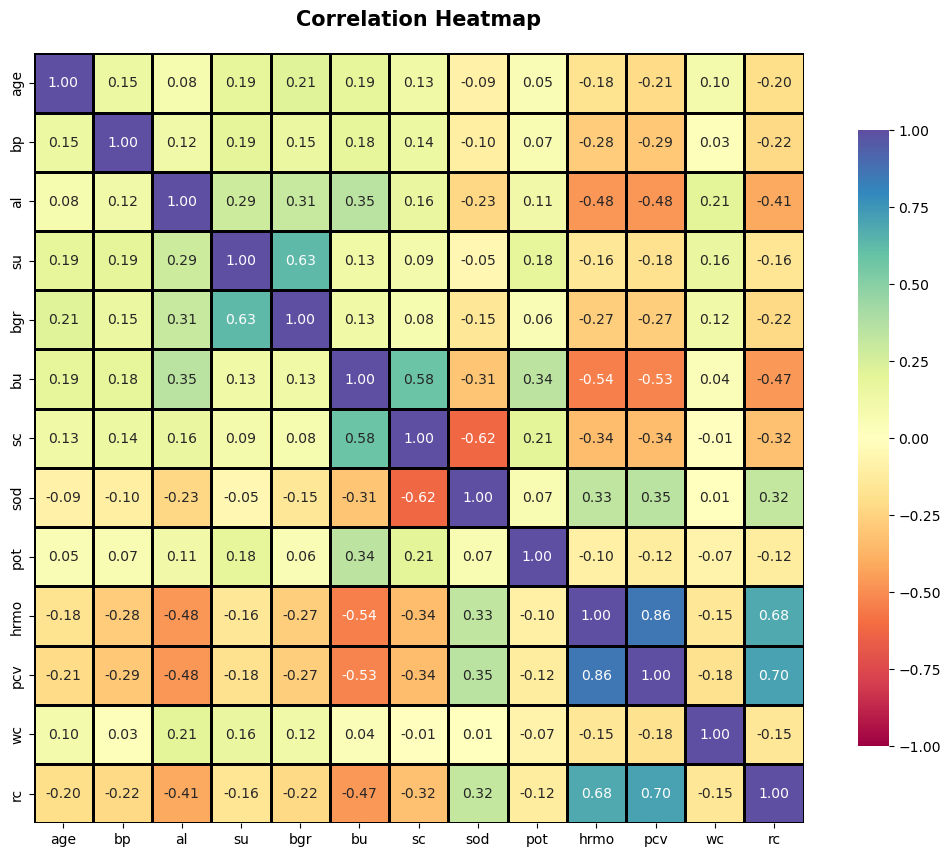

In [35]:
# Compute and visualize the correlation matrix as a heatmap

corr_matrix = df[numerical_columns].corr()

plt.figure(figsize=(14, 10))  # Set figure size
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Spectral", 
            linewidths=2, linecolor='black', annot_kws={"size": 10}, 
            vmin=-1, vmax=1, center=0, square=True, cbar_kws={"shrink": 0.8})

plt.title("Correlation Heatmap", fontsize=15, fontweight="bold", pad=20)
plt.show()


In [36]:
# Violin plot function to compare multiple columns with classification category 

def compare_violin_individual(data, columns, class_col="classification"):

    # Filter data into two separate DataFrames
    data_yes = data[data[class_col] == "yes"]
    data_no = data[data[class_col] == "no"]

    # Convert to long format for violin plot
    melted_yes = data_yes.melt(value_vars=columns, var_name="Feature", value_name="Value")
    melted_no = data_no.melt(value_vars=columns, var_name="Feature", value_name="Value")

    # Create figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    # Plot "Yes" category
    sns.violinplot(x="Feature", y="Value", data=melted_yes, palette="Blues", ax=axes[0])
    axes[0].set_title(f"{class_col} = yes", fontsize=14, fontweight="bold")
    axes[0].set_xlabel("Features", fontsize=12)
    axes[0].set_ylabel("Value", fontsize=12)
    axes[0].tick_params(axis="x", rotation=15)

    # Plot "No" category
    sns.violinplot(x="Feature", y="Value", data=melted_no, palette="Reds", ax=axes[1])
    axes[1].set_title(f"{class_col} = no", fontsize=14, fontweight="bold")
    axes[1].set_xlabel("Features", fontsize=12)
    axes[1].tick_params(axis="x", rotation=15)

    plt.suptitle(f"Comparison of {columns} by {class_col}", fontsize=16, fontweight="bold")
    plt.tight_layout()
    plt.show()


C:\Users\ANISH\AppData\Local\Temp\ipykernel_9704\3251580132.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Feature", y="Value", data=melted_yes, palette="Blues", ax=axes[0])
C:\Users\ANISH\AppData\Local\Temp\ipykernel_9704\3251580132.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Feature", y="Value", data=melted_no, palette="Reds", ax=axes[1])


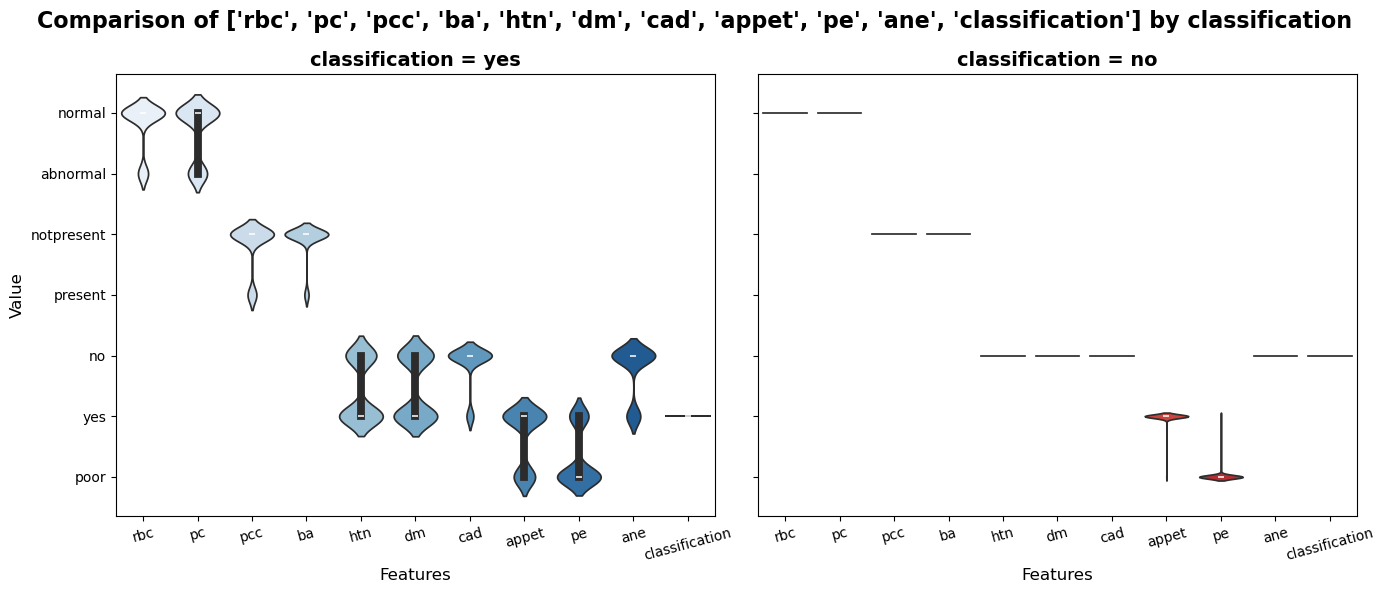

In [37]:
# Violin plot of categorical columns

compare_violin_individual(df, [
    # 'sg',
  'rbc',
  'pc',
  'pcc',
  'ba',
  'htn',
  'dm',
  'cad',
  'appet',
  'pe',
  'ane',
  'classification'
                              ], class_col="classification")  # Compare 'bp' and 'bu' for "Yes" and "No" in classification


C:\Users\ANISH\AppData\Local\Temp\ipykernel_9704\3251580132.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Feature", y="Value", data=melted_yes, palette="Blues", ax=axes[0])
C:\Users\ANISH\AppData\Local\Temp\ipykernel_9704\3251580132.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Feature", y="Value", data=melted_no, palette="Reds", ax=axes[1])


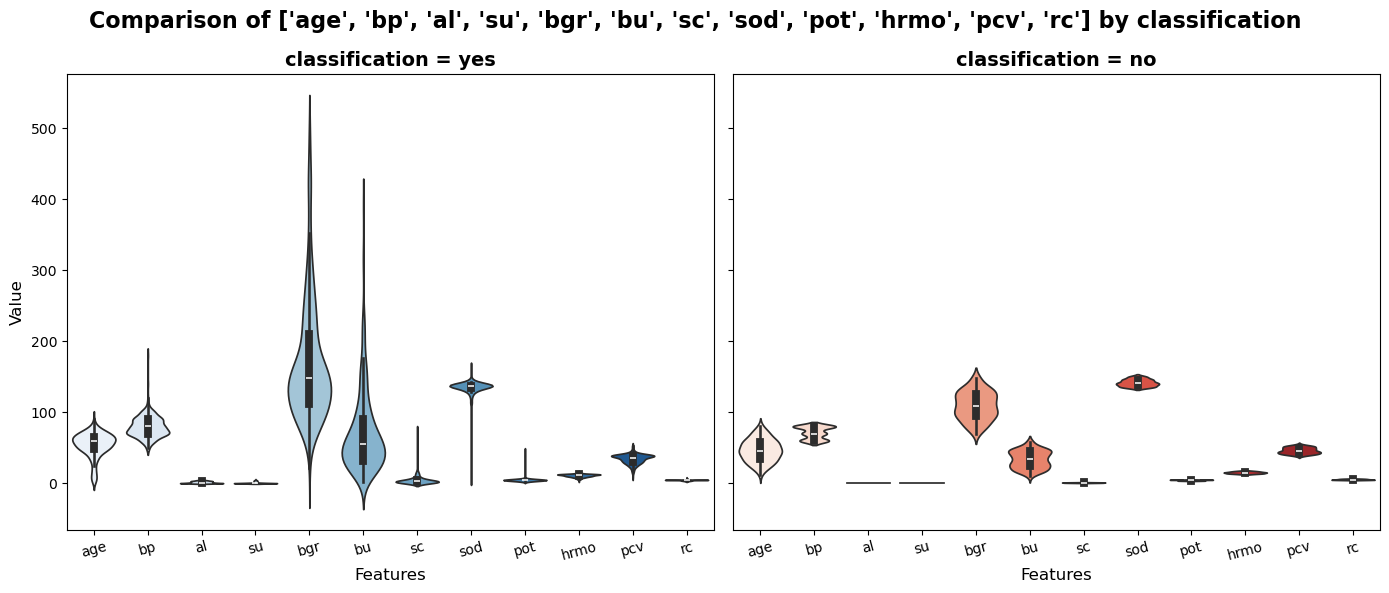

In [38]:
# Violin plot of numerical columns

compare_violin_individual(df, [
    'age',
 'bp',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hrmo',
 'pcv',
 #'wc',
 'rc'], class_col="classification")  # Compare 'bp' and 'bu' for "Yes" and "No" in classification


In [39]:
# Label Encoder - sg (map each)  
column_name = 'sg'
mapping = {'a':0, 'b':1, 'c':2,'d':3,'e':4}
df[column_name] = df[column_name].map(mapping)
categorical_columns.remove(column_name)


In [40]:
# Preprocess the other categorical columns data

column_name = categorical_columns
mapping = {'abnormal':1, 'no': 0, 'normal':0, 'notpresent':0, 'poor':0, 'present':1, 'yes':1}
df[column_name] = df[column_name].applymap(lambda x: mapping.get(x, x))

df[column_name].head()

C:\Users\ANISH\AppData\Local\Temp\ipykernel_9704\2569007687.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[column_name] = df[column_name].applymap(lambda x: mapping.get(x, x))


,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,0,1,0,0,0,0,0,1,1,0,1
1,0,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,1,0,1,1
4,0,0,0,0,0,0,0,1,0,0,1


In [41]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['classification'])  # Features
y = df['classification']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


In [42]:
# SVC
from sklearn.svm import SVC
from sklearn.metrics import f1_score

# Train SVM Classifier
clf = SVC(kernel='linear', C=1.0)  # Linear kernel (change to 'rbf' or 'poly' for non-linear)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        39
           1       1.00      0.95      0.97        41

    accuracy                           0.97        80
   macro avg       0.98      0.98      0.97        80
weighted avg       0.98      0.97      0.97        80



In [43]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.98      1.00      0.99        41

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [44]:
# Model selection :Random Forest 
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier() 

# train the model
clf.fit(X_train, y_train)

# test the model
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        41

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [21]:
# save best model
import pickle 

pickle.dump(clf, open('classification_best_model.sav', 'wb'))